In [48]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot
import matplotlib.pyplot as plt

current_font_list = matplotlib.rcParams['font.family']

font_path = "C:\Windows\Fonts\malgunbd.ttf"
kfont = matplotlib.font_manager.FontProperties(fname = font_path).get_name()
matplotlib.rcParams['font.family'] = [kfont] + current_font_list


pd_data = pd.read_csv('park.csv')
print(pd_data)

          지자체명  공원구분             공원명         위도          경도      공원면적  \
0        서울특별시   소공원           녹색소공원  37.539217  126.962694    1569.9   
1      세종특별자치시   소공원   푸름샘 소공원(소1-1)  36.516117  127.233781    1820.0   
2      세종특별자치시   소공원    솔숲 소공원(소1-2)  36.508995  127.230040    1037.0   
3      세종특별자치시  수변공원  마디꽃 수변공원(수1-1)  36.495962  127.257316    4928.0   
4      세종특별자치시  수변공원    꽃 수변공원(수2-3)  36.473133  127.254482    3575.0   
...        ...   ...             ...        ...         ...       ...   
17576    서울특별시    기타              방배  37.474225  126.995298  210517.2   
17577    서울특별시    기타            말죽거리  37.480885  127.030469  280822.6   
17578    서울특별시  근린공원             서리풀  37.484654  127.000420  465938.3   
17579    서울특별시  근린공원              방배  37.470535  126.989600   74847.6   
17580    서울특별시  근린공원            말죽거리  37.479294  127.029304  132020.3   

            지정고시일  
0      2012-10-19  
1      2011-08-05  
2      2011-08-05  
3      2007-07-04  
4      2009-01-07  
...

C:\Users\ITPS\AppData\Local\Temp\ipykernel_4116\2536184394.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_group = g1.mean()
C:\Users\ITPS\AppData\Local\Temp\ipykernel_4116\2536184394.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  df_group_pv = df_group.reset_index().pivot('지자체명', '공원구분', '공원면적')


<AxesSubplot: xlabel='공원구분', ylabel='지자체명'>

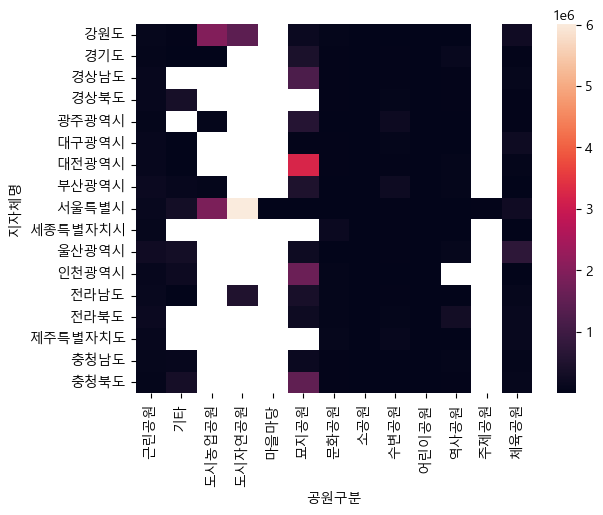

In [29]:
g1 = pd_data.groupby(['지자체명', '공원구분'])
df_group = g1.mean()
df_group_pv = df_group.reset_index().pivot('지자체명', '공원구분', '공원면적')
sns.heatmap(df_group_pv)

C:\Users\ITPS\AppData\Local\Temp\ipykernel_4116\2805229668.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  df_group_pv = df_group.reset_index().pivot('지자체명', '공원구분', '공원면적')


<AxesSubplot: xlabel='공원구분', ylabel='지자체명'>

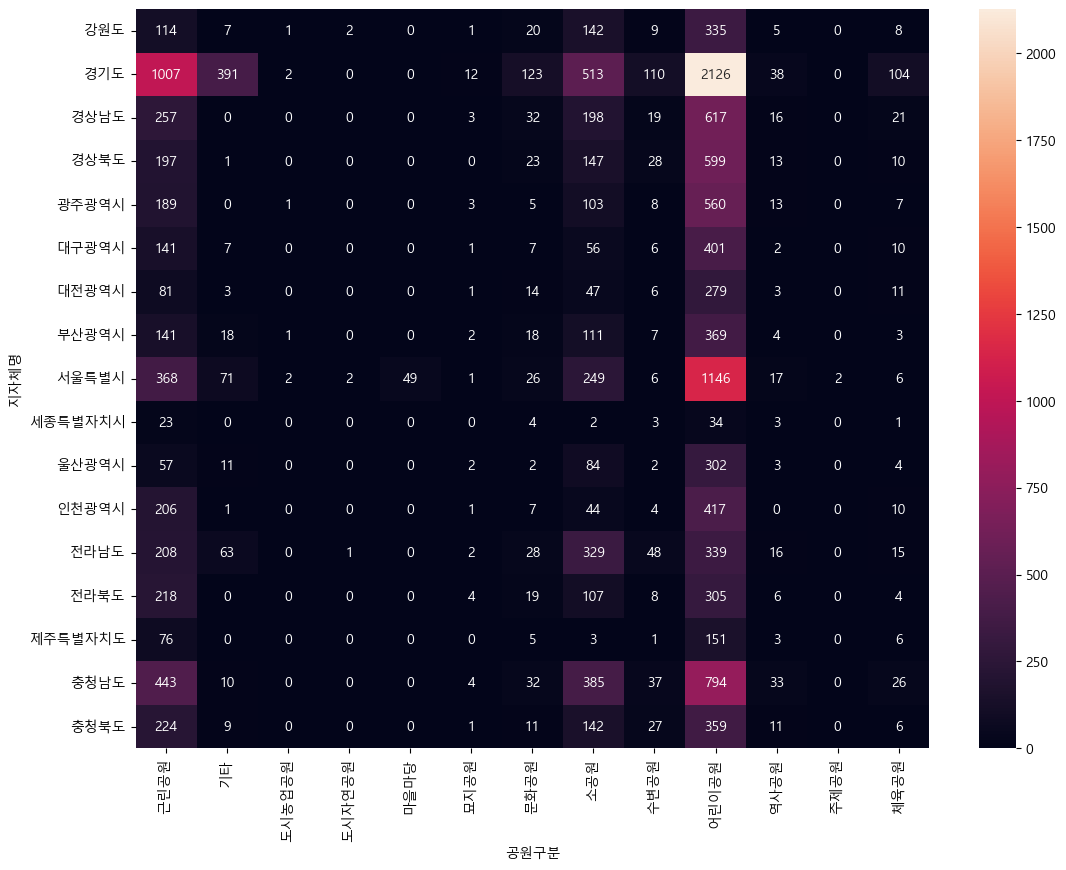

In [50]:
g2 = pd_data.groupby(['지자체명', '공원구분'])
df_group = g2.count()
# df_group
df_group_pv = df_group.reset_index().pivot('지자체명', '공원구분', '공원면적')
df_group_pv = df_group_pv.fillna(0.0)

fig = plt.figure(figsize = (6.4 * 2, 4.8 * 2))
ax1 = fig.add_subplot()
sns.heatmap(df_group_pv.fillna(0.0), annot = True, fmt='.0f', ax = ax1)
# sns.heatmap(df_group_pv)

ValueError: Could not interpret value `공원구분` for parameter `x`

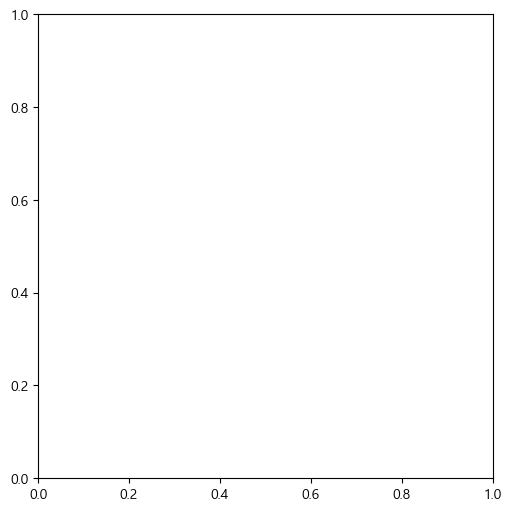

In [52]:
import cv2 as cv
import numpy as np

from PIL import Image
import matplotlib as image
import matplotlib.pyplot as plt
from matplotlib import image

fig, ax = plt.subplots(figsize=(5, 5), constrained_layout=True)
sns.kdeplot(x="공원구분", y="공원면적", data=df_group_pv, ax=ax,
            fill=True, levels=100, cmap="inferno")

# x, y 범위 반올림 재설정
xmin, xmax = np.round(ax.get_xlim(),2)
ymin, ymax = np.round(ax.get_ylim(),2)
print(f"xmin, xmax = {xmin}, {xmax}")
print(f"ymin, ymax = {ymin}, {ymax}")
ax.set(xlim=(xmin, xmax), ylim=(ymin, ymax))

# 윤곽선 눈금
ax.axvline(xmin, lw=0.01, c="green")
ax.axvline(xmax, lw=0.01, c="green")
ax.axhline(ymin, lw=0.01, c="green")
ax.axhline(ymax, lw=0.01, c="green")
ax.axis(False)

fig.savefig("KDE_peng.png")
display(fig)

im_pengkde = image.imread('KDE_peng.png')
print(im_pengkde.shape)

_, axe = plt.subplots()
plt.imshow(im_pengkde[:10, :10])

import matplotlib.colors as mcolors

idx_gx, idx_gy, _ =  np.where(im_pengkde[:5, :5] != mcolors.to_rgba("w"))
print(idx_gx, idx_gy, _)
im_pengkde= im_pengkde[idx_gx[0]+1:-idx_gx[0]-2, idx_gy[0]+1:-idx_gx[0]-2]
print(im_pengkde[:2, :2])
print(im_pengkde.shape)

from colorspacious import cspace_converter

im_pengkde_L = np.zeros(im_pengkde.shape[:2])
for i in range(im_pengkde.shape[0]):
    for j in range(im_pengkde.shape[1]):
        RGB = im_pengkde[i, j][:3]
        if sum(RGB - np.array([1, 1, 1])) == 0:
            im_pengkde_L[i, j] = -1   
        else: 
            lab = cspace_converter("sRGB1", "CAM02-UCS")(RGB)
            im_pengkde_L[i, j] = lab[0]
            

plt.imshow(im_pengkde_L, cmap="inferno",
           extent=[xmin, xmax, ymin, ymax], 
           aspect=(xmax-xmin)/(ymax-ymin))

xs = np.linspace(xmin, xmax, im_pengkde.shape[1])
ys = np.linspace(ymin, ymax, im_pengkde.shape[0])
xx, yy = np.meshgrid(xs, ys)

# 3D plot
fig, ax = plt.subplots(figsize=(5, 5), constrained_layout=True,
                       subplot_kw={"projection":"3d"})
ax.plot_surface(xx, yy, im_pengkde_L)